# A Romanian text corpus

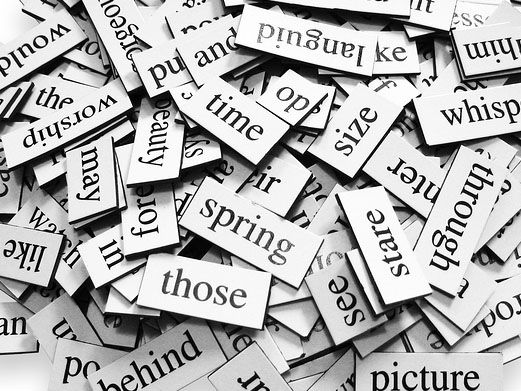

As strange as it may seem I wasn't able to find a fully Romanian text corpus that I needed for one of my project. (there is [this](http://corola.racai.ro/) but didn't figure out if a full download was available). There's also a [romanian corpus of newspaper articles](https://web.eecs.umich.edu/~mihalcea/downloads.html#romanian) which you have to request access to and is only for research).  


For the English language you can find a reasonable amount of text documents bundled up in a dataset. This also applies to the other really common languages like French and Spanish but if you go beyond that you may find it difficult to get good datasets.

You may be wondering where would you use such a corpus. One of the reasonable tasks that requires as large a corpus of text that you can get is building a language model. This can later on be used in a classification task (eg. sentiment analisys).

# Negative sampling

But you can even get more creative than that, like the case where you want to train a classifier to detect a really niche topic (eg. law text). Usually you'd get a corpus of that niche domain (all the laws passed in that country) which will all be positive lables but you need to contrast that with some negative lables. 

Negative lables should represent a random sample of common text, something that could end up in the predictor but which you know is not part of your niche domain.

In english, if I'd do this I'd take the 20newsgroup dataset, or the  Reuters-21578 dataset or one of the many datasets used to train English language models and sample from that, but there seems to be no Romanian corpus equivalent.

# Wikipedia dataset

Of course, English has Wikipedia derived datasets, and Wikipedia also has a Romanian language variant so I was expecting to find a similar one already compiled but much to my surprise I couldn't find one. So I decided to build it mayself.

The first thing to do is download a Wikipedia dump. A single romanian language dump for 2016 is 1.5 archived and 85 GB decompressed. But if you look closely, you can download only the bit that you're interested in (in this case, the articles archive). Wikipedia also exposes a miriad other info as you can see bellow.

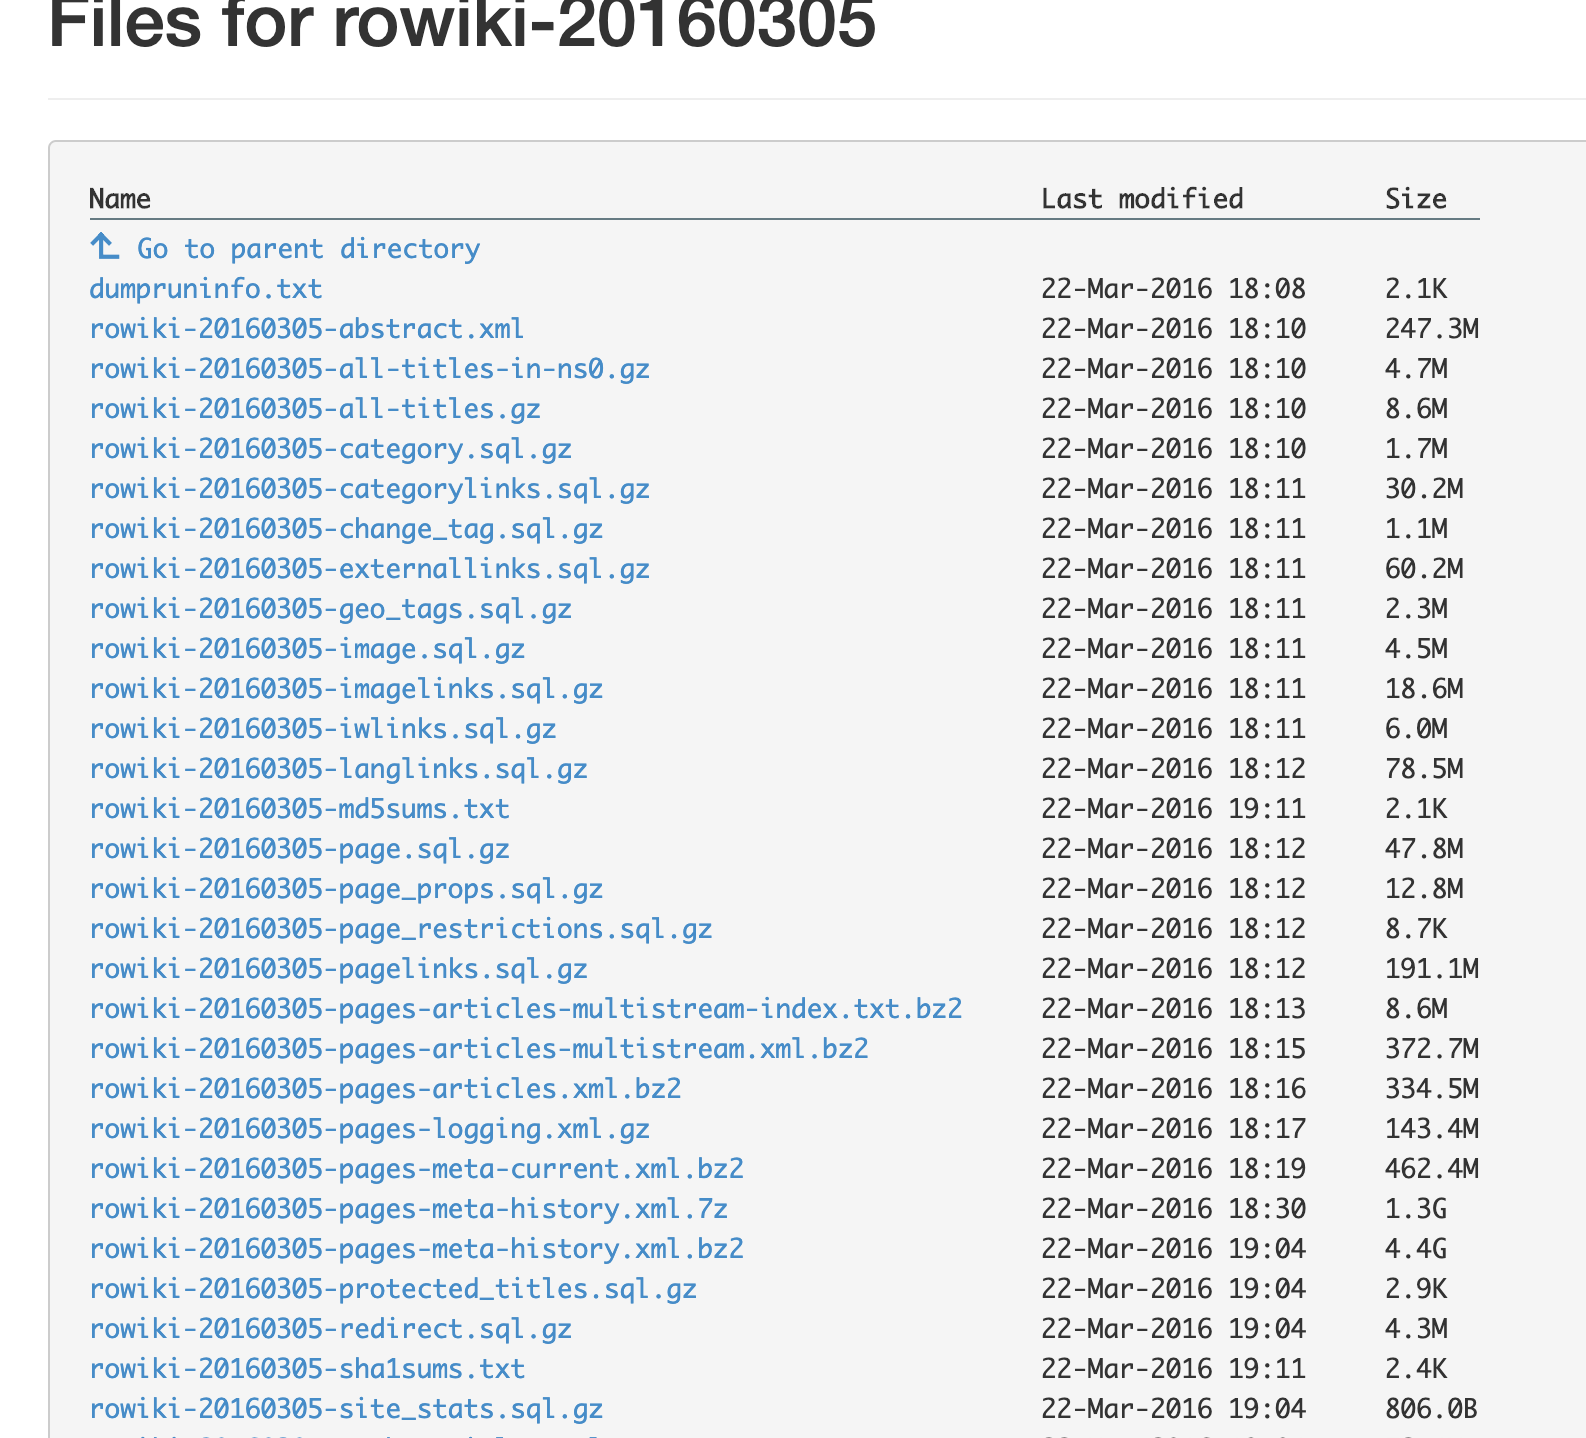

So we only got the articles file.

In [2]:
!wget https://archive.org/download/rowiki-20160305/rowiki-20160305-pages-articles.xml.bz2

--2020-01-16 10:26:46--  https://archive.org/download/rowiki-20160305/rowiki-20160305-pages-articles.xml.bz2
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia800204.us.archive.org/25/items/rowiki-20160305/rowiki-20160305-pages-articles.xml.bz2 [following]
--2020-01-16 10:26:50--  https://ia800204.us.archive.org/25/items/rowiki-20160305/rowiki-20160305-pages-articles.xml.bz2
Resolving ia800204.us.archive.org (ia800204.us.archive.org)... 207.241.230.24
Connecting to ia800204.us.archive.org (ia800204.us.archive.org)|207.241.230.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 350721614 (334M) [application/octet-stream]
Saving to: ‘rowiki-20160305-pages-articles.xml.bz2’

rowiki-20160305-pag 100%[===================>] 334,47M  1,42MB/s    in 3m 44s  

2020-01-16 10:30:36 (1,49 MB/s) - ‘rowiki-20160305-pages-articles.x

# Transformation

Now we need a way to convert it into a dataset. The file we got is an XML that contains all sorts of wiki markup code. Fortunately the gensim library conveniently provides a parser for wikipedia xmls. 

The code bellow is really straight forward. It extracts one article at a time, makes it a single line (by removing all the `\n` characters) and appends that on the output file.

In [7]:
"""
Creates a corpus from Wikipedia dump file.
"""

import sys
from gensim.corpora import WikiCorpus
from tqdm import tqdm_notebook as tqdm

licence = """
# Licence: Creative Commons Attribution-Share-Alike 3.0 License - https://creativecommons.org/licenses/by-sa/3.0/legalcode
# Original attribution: Wikimedia foundation - https://dumps.wikimedia.org/
# Changes made: The data was striped of the markup language and newlines. Each line represents the contents of a full page
# Author: lungu.cristian@gmail.com
"""

def strip_wiki_markup(wiki_dump_file_path, output_file_path):
    """
    Convert Wikipedia xml dump file to text corpus, in a one-article-per-line file 
    """

    wiki = WikiCorpus(wiki_dump_file_path)
    with open(output_file_path, 'w') as f:
        f.write(licence)
        number_of_documents = len(wiki)
        for texts in tqdm(wiki.get_texts(), total=number_of_documents):
            article = ' '.join(texts)
            one_line_article = article.replace("\n", " ")
            f.write(one_line_article + "\n")
            
strip_wiki_markup("rowiki-20160305-pages-articles.xml.bz2", "wiki_ro.txt")

# Packaging up

In [9]:
!ls -al wiki_ro.txt

-rw-rw-r-- 1 tecknoworks tecknoworks 454283813 ian 16 11:53 wiki_ro.txt


We can make a zip archive an call it a day

In [ ]:
!zip -9 wiki_ro.zip wiki_ro.txt 

I've hosted the file for you and you can downloaded it [here](https://drive.google.com/file/d/1Do2qN55N--NVtEj_OMxJwLzoB75sB2yR/view?usp=sharing) if you need it. You're welcomed!